In [1]:
# adds the project specific libs to the sys path
import sys
from pathlib import Path

proj_lib_path = str(Path.cwd().parent / 'libs')
if proj_lib_path not in sys.path:
    sys.path.insert(1, proj_lib_path)
    print(f'added {proj_lib_path} to the sys.path')

added /Users/n0c09jf/code/github/tryml/projects/mlops-k8deploy/libs to the sys.path


In [2]:
from flower_predictor.config import MODEL_DIR, DATA_DIR
import os

print(f'models area at {MODEL_DIR}')
print(f'data is at {DATA_DIR}')

models area at /Users/n0c09jf/code/github/tryml/projects/mlops-k8deploy/_models
data is at /Users/n0c09jf/code/github/tryml/projects/mlops-k8deploy/_data


In [3]:
from sklearn import datasets

iris = datasets.load_iris(return_X_y=False)
x = iris.data
y = iris.target
print(
    f'x={x.shape}, y={y.shape}', 
    f'features={iris["feature_names"]}', 
    f'flower_kinds={iris.target_names}', sep="\n")

x=(150, 4), y=(150,)
features=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
flower_kinds=['setosa' 'versicolor' 'virginica']


In [4]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.column_stack((x, y)), columns=[*iris['feature_names'], 'flower_kind'])
df['flower_kind'] = df['flower_kind'].apply(lambda x: iris.target_names[int(x)])
print(df['flower_kind'].value_counts())
df.describe()

flower_kind
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


/var/folders/vm/2g2pvy116zzglvllmm0n_f100000gx/T/ipykernel_71486/1431836124.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


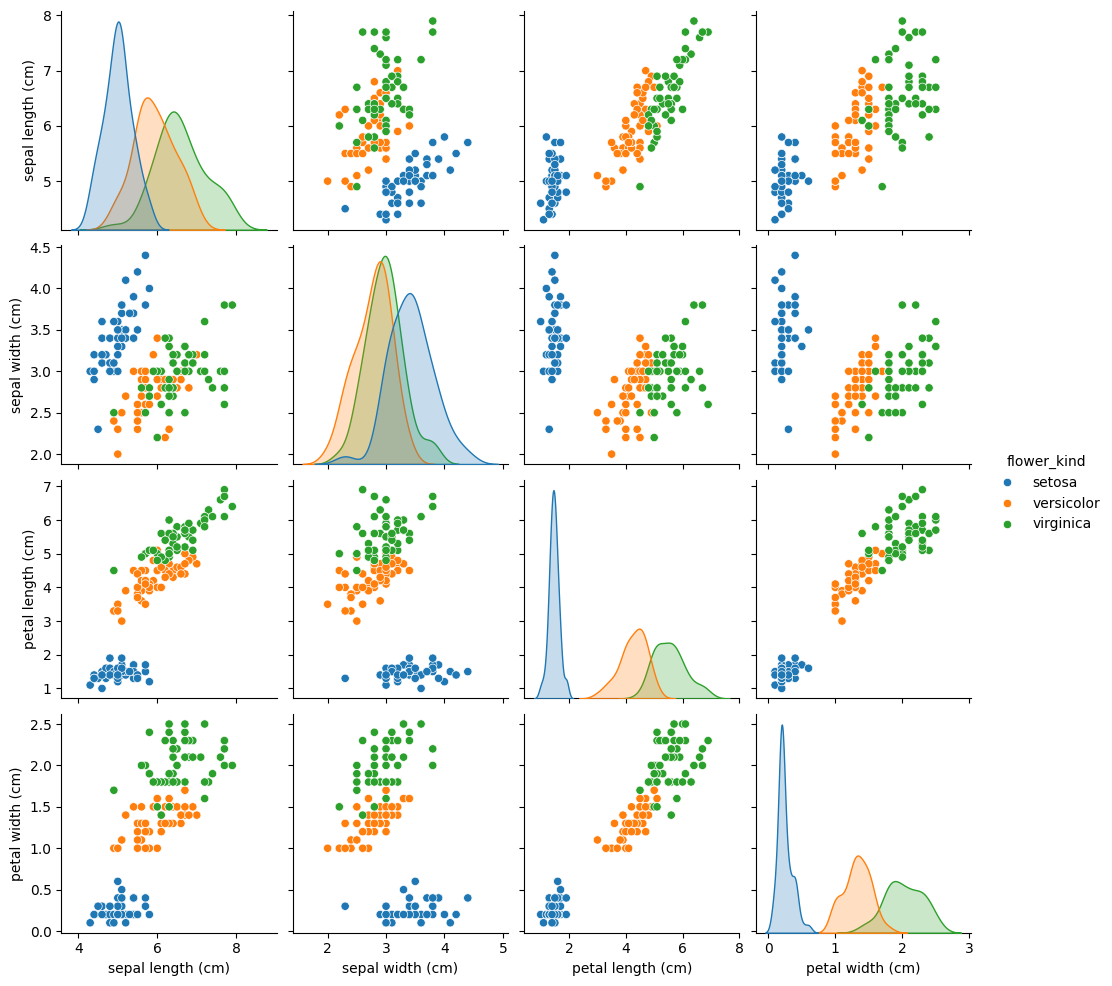

In [5]:
import seaborn as sns

sns.pairplot(df, hue='flower_kind')

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

print(f'train size={len(X_train)}', f'test size={len(X_test)}', sep="\n")

train size=120
test size=30


In [7]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, Y_train)

SVC()

In [8]:
from sklearn.metrics import accuracy_score

Y_pred = model.predict(X_test)
print(f'accuracy={accuracy_score(Y_test, Y_pred)*100}%')

accuracy=90.0%


In [9]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      0.89      0.84         9
           2       0.91      0.83      0.87        12

    accuracy                           0.90        30
   macro avg       0.90      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30



In [10]:
from flower_predictor.config import MODEL_DIR
import joblib, os

joblib.dump(model, os.path.join(MODEL_DIR, 'model_iris_final.h5')) 

['/Users/n0c09jf/code/github/tryml/projects/mlops-k8deploy/_models/model_iris_final.h5']

In [12]:
from flower_predictor.config import MODEL_DIR
from flower_predictor.predict import FlowerClassifier

classifer = FlowerClassifier(
    flower_kinds = iris.target_names,
    model_path = os.path.join(MODEL_DIR, 'model_iris_final.h5')
)
print(iris.target_names[Y_test[0]], '<=>', classifer.predict(X_test[0:1]))
print(classifer.predict(np.array([[2, 2, 1, 0.1]])))

virginica <=> ['virginica']
['setosa']
